In [4]:
import pandas as pd
from datetime import datetime, timedelta

In [68]:
# load the data
data = pd.read_csv('data/hyy/Hyde_2018_APi2_ground_3_3e9.txt', sep='\s+', header=None, names=['time', 'sa', 'msa', '4', '5', '6', '7', '8', '9'])#, names=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'CS'])

In [70]:
data.drop(['4', '5', '6', '7', '8', '9'], axis=1, inplace=True)

In [71]:
data

,time,sa,msa
0,737127.000000,96389.357188,14668.768672
1,737127.020833,87607.840000,28570.312891
2,737127.041667,85250.393750,8530.557305
3,737127.062500,100280.912500,4568.241709
4,737127.083333,83679.699375,9673.944609
...,...,...,...
7467,737286.083333,NaN,28365.278359
7468,737286.104167,14811.438477,NaN
7469,737286.125000,39207.501562,5346.950898
7470,737286.145833,36680.113047,26111.588672


In [81]:
from datetime import datetime, timedelta

# Create DataFrame
df = pd.DataFrame(data)

matlab_epoch = datetime(1, 1, 1)  # MATLAB epoch starts from year 0000
days_offset = timedelta(days=366)  # Adjust for MATLAB's leap year bug

# Convert datenum to datetime
df["real_time"] = df["time"].apply(lambda x: matlab_epoch + timedelta(days=x) - days_offset)

# Print DataFrame
print(df)

               time             sa           msa                  real_time
0     737127.000000   96389.357188  14668.768672 2018-03-09 00:00:00.000000
1     737127.020833   87607.840000  28570.312891 2018-03-09 00:30:00.000013
2     737127.041667   85250.393750   8530.557305 2018-03-09 00:59:59.999987
3     737127.062500  100280.912500   4568.241709 2018-03-09 01:30:00.000000
4     737127.083333   83679.699375   9673.944609 2018-03-09 02:00:00.000013
...             ...            ...           ...                        ...
7467  737286.083333            NaN  28365.278359 2018-08-15 02:00:00.000013
7468  737286.104167   14811.438477           NaN 2018-08-15 02:29:59.999987
7469  737286.125000   39207.501562   5346.950898 2018-08-15 03:00:00.000000
7470  737286.145833   36680.113047  26111.588672 2018-08-15 03:30:00.000013
7471  737286.166667   45904.525937           NaN 2018-08-15 03:59:59.999987

[7472 rows x 4 columns]


In [82]:
df.drop(['time'], axis=1, inplace=True)

In [83]:
df

,sa,msa,real_time
0,96389.357188,14668.768672,2018-03-09 00:00:00.000000
1,87607.840000,28570.312891,2018-03-09 00:30:00.000013
2,85250.393750,8530.557305,2018-03-09 00:59:59.999987
3,100280.912500,4568.241709,2018-03-09 01:30:00.000000
4,83679.699375,9673.944609,2018-03-09 02:00:00.000013
...,...,...,...
7467,NaN,28365.278359,2018-08-15 02:00:00.000013
7468,14811.438477,NaN,2018-08-15 02:29:59.999987
7469,39207.501562,5346.950898,2018-08-15 03:00:00.000000
7470,36680.113047,26111.588672,2018-08-15 03:30:00.000013


In [84]:
df.set_index("real_time", inplace=True)

In [88]:
df = df.interpolate()

In [89]:
df

,sa,msa
real_time,,
2018-03-09 00:00:00.000000,96389.357188,14668.768672
2018-03-09 00:30:00.000013,87607.840000,28570.312891
2018-03-09 00:59:59.999987,85250.393750,8530.557305
2018-03-09 01:30:00.000000,100280.912500,4568.241709
2018-03-09 02:00:00.000013,83679.699375,9673.944609
...,...,...
2018-08-15 02:00:00.000013,16398.501992,28365.278359
2018-08-15 02:29:59.999987,14811.438477,16856.114629
2018-08-15 03:00:00.000000,39207.501562,5346.950898


In [90]:
# Filter for spring (March to May) and autumn (September to November)
spring = df[(df.index.month >= 3) & (df.index.month <= 5)]
autumn = df[(df.index.month >= 9) & (df.index.month <= 11)]


spring_sa_med = spring['sa'].median()
autumn_sa_med = autumn['sa'].median()

print(f"Median CS in Spring: {spring_sa_med}")
print(f"Median CS in Autumn: {autumn_sa_med}")

Median CS in Spring: 131087.72578125
Median CS in Autumn: nan


In [92]:
spring

,sa,msa
real_time,,
2018-03-09 00:00:00.000000,96389.357188,14668.768672
2018-03-09 00:30:00.000013,87607.840000,28570.312891
2018-03-09 00:59:59.999987,85250.393750,8530.557305
2018-03-09 01:30:00.000000,100280.912500,4568.241709
2018-03-09 02:00:00.000013,83679.699375,9673.944609
...,...,...
2018-05-31 21:30:00.000013,124512.868438,71991.027344
2018-05-31 21:59:59.999987,121779.319375,50342.522812
2018-05-31 22:30:00.000000,110986.153750,65620.919062


In [98]:
autumn

,sa,msa
real_time,,


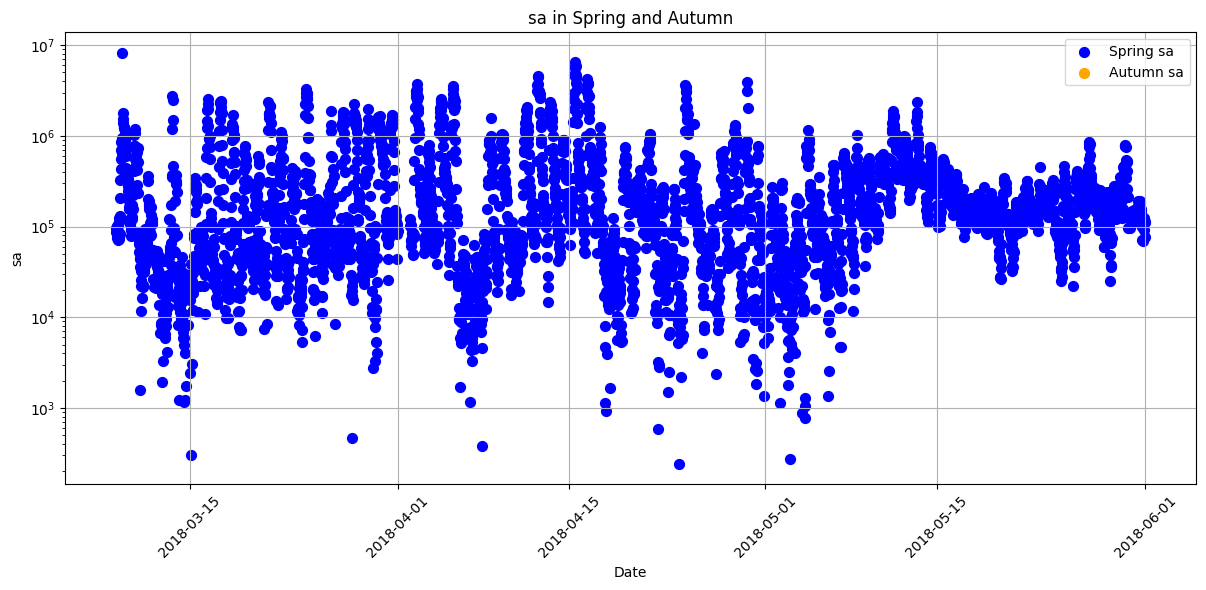

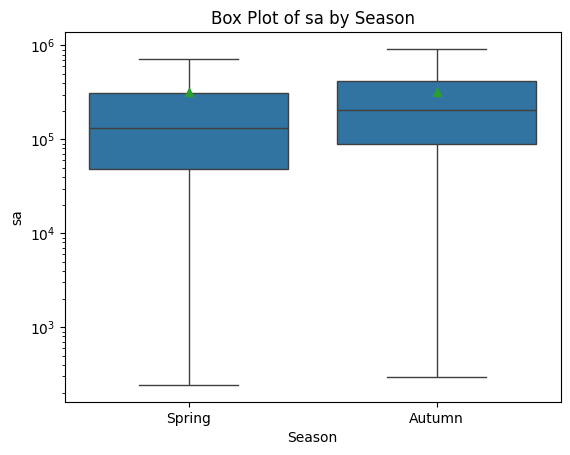

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.scatter(spring.index, spring['sa'], label='Spring sa', color='blue', marker='o', s=50)
plt.scatter(autumn.index, autumn['sa'], label='Autumn sa', color='orange', marker='o', s=50)
plt.title('sa in Spring and Autumn')
plt.xlabel('Date')
plt.ylabel('sa')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.yscale('log')
plt.show()

# Box Plot
df['Season'] = ['Spring' if (3 <= m <= 5) else 'Autumn' for m in df.index.month]
sns.boxplot(x='Season', y='sa', data=df.reset_index(), showmeans= True, showfliers= False)
plt.title('Box Plot of sa by Season')
plt.yscale('log')
plt.show()

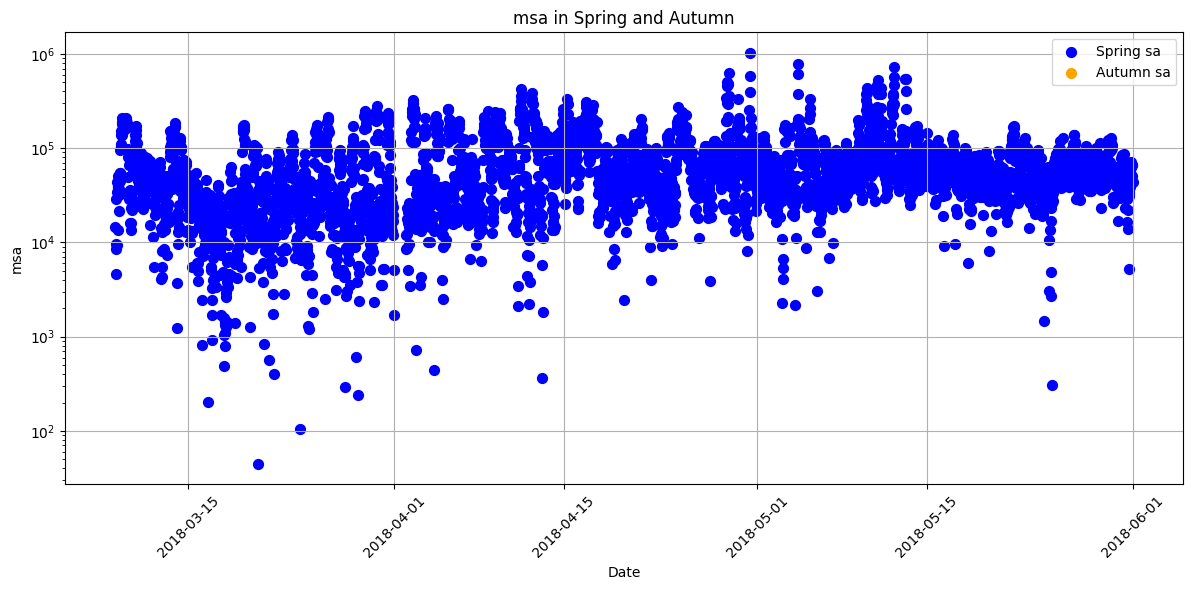

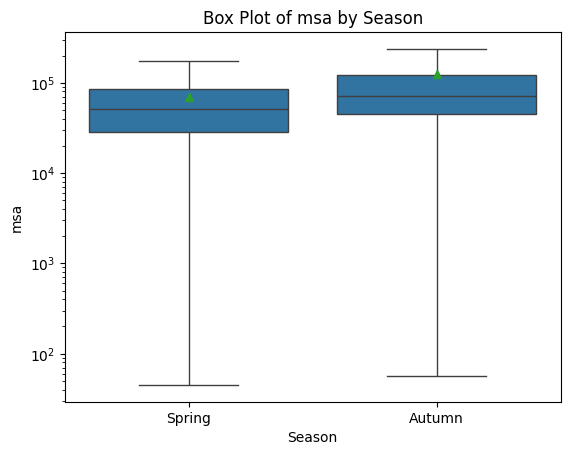

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.scatter(spring.index, spring['msa'], label='Spring sa', color='blue', marker='o', s=50)
plt.scatter(autumn.index, autumn['msa'], label='Autumn sa', color='orange', marker='o', s=50)
plt.title('msa in Spring and Autumn')
plt.xlabel('Date')
plt.ylabel('msa')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.yscale('log')
plt.show()

# Box Plot
df['Season'] = ['Spring' if (3 <= m <= 5) else 'Autumn' for m in df.index.month]
sns.boxplot(x='Season', y='msa', data=df.reset_index(), showmeans= True, showfliers= False)
plt.title('Box Plot of msa by Season')
plt.yscale('log')
plt.show()

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load Data
wind = pd.read_csv("data/hyy/wind2018.csv")
wind

,Observation station,Year,Month,Day,Time [Local time],Wind speed [m/s],Wind direction [°]
0,Hailuoto Keskikylä,2018,3,9,00:00,1.8,81
1,Hailuoto Keskikylä,2018,3,9,00:10,1.7,86
2,Hailuoto Keskikylä,2018,3,9,00:20,1.8,88
3,Hailuoto Keskikylä,2018,3,9,00:30,1.9,86
4,Hailuoto Keskikylä,2018,3,9,00:40,1.9,93
...,...,...,...,...,...,...,...
23003,Hailuoto Keskikylä,2018,8,15,23:10,1.2,83
23004,Hailuoto Keskikylä,2018,8,15,23:20,1.3,78
23005,Hailuoto Keskikylä,2018,8,15,23:30,1.3,82
23006,Hailuoto Keskikylä,2018,8,15,23:40,1.0,101


In [122]:
# Convert 'Time [Local time]' to datetime
wind["real_time"] = pd.to_datetime(wind[["Year", "Month", "Day"]].astype(str).agg('-'.join, axis=1) + ' ' + wind["Time [Local time]"])
wind.drop(['Year', 'Month', 'Day', 'Time [Local time]'], axis=1, inplace=True)
wind.set_index("real_time", inplace=True)

In [123]:
wind.drop(['Observation station'], axis=1, inplace=True)
wind

,Wind speed [m/s],Wind direction [°]
real_time,,
2018-03-09 00:00:00,1.8,81
2018-03-09 00:10:00,1.7,86
2018-03-09 00:20:00,1.8,88
2018-03-09 00:30:00,1.9,86
2018-03-09 00:40:00,1.9,93
...,...,...
2018-08-15 23:10:00,1.2,83
2018-08-15 23:20:00,1.3,78
2018-08-15 23:30:00,1.3,82


In [ ]:
# Resample data to 30-minute intervals and take the mean of each period
wind_re = wind.resample("30T").mean().reset_index()

            real_time  Wind speed [m/s]  Wind direction [°]
0 2018-03-09 00:00:00          1.766667           85.000000
1 2018-03-09 00:30:00          1.933333           89.333333
2 2018-03-09 01:00:00          2.066667           87.333333
3 2018-03-09 01:30:00          2.000000           88.666667
4 2018-03-09 02:00:00          2.100000           87.000000


/var/folders/84/s3w90k8n61761cb4myvkgj490l4gj4/T/ipykernel_93392/3401393038.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  wind_re = wind.resample("30T").mean().reset_index()


In [125]:
wind_re

,real_time,Wind speed [m/s],Wind direction [°]
0,2018-03-09 00:00:00,1.766667,85.000000
1,2018-03-09 00:30:00,1.933333,89.333333
2,2018-03-09 01:00:00,2.066667,87.333333
3,2018-03-09 01:30:00,2.000000,88.666667
4,2018-03-09 02:00:00,2.100000,87.000000
...,...,...,...
7675,2018-08-15 21:30:00,1.133333,66.666667
7676,2018-08-15 22:00:00,0.266667,19.666667
7677,2018-08-15 22:30:00,0.600000,53.666667
7678,2018-08-15 23:00:00,1.333333,80.666667


In [126]:
df

,sa,msa,Season
real_time,,,
2018-03-09 00:00:00.000000,96389.357188,14668.768672,Spring
2018-03-09 00:30:00.000013,87607.840000,28570.312891,Spring
2018-03-09 00:59:59.999987,85250.393750,8530.557305,Spring
2018-03-09 01:30:00.000000,100280.912500,4568.241709,Spring
2018-03-09 02:00:00.000013,83679.699375,9673.944609,Spring
...,...,...,...
2018-08-15 02:00:00.000013,16398.501992,28365.278359,Autumn
2018-08-15 02:29:59.999987,14811.438477,16856.114629,Autumn
2018-08-15 03:00:00.000000,39207.501562,5346.950898,Autumn


In [128]:
data = pd.merge(df, wind_re, on='real_time', how='inner')

In [130]:
data.head()

,real_time,sa,msa,Season,Wind speed [m/s],Wind direction [°]
0,2018-03-09 00:00:00,96389.357188,14668.768672,Spring,1.766667,85.000000
1,2018-03-09 01:30:00,100280.912500,4568.241709,Spring,2.000000,88.666667
2,2018-03-09 03:00:00,89568.946875,43907.187187,Spring,2.700000,94.333333
3,2018-03-09 04:30:00,85380.930000,13460.826914,Spring,3.266667,101.333333
4,2018-03-09 06:00:00,124691.055313,21632.418594,Spring,3.566667,102.000000


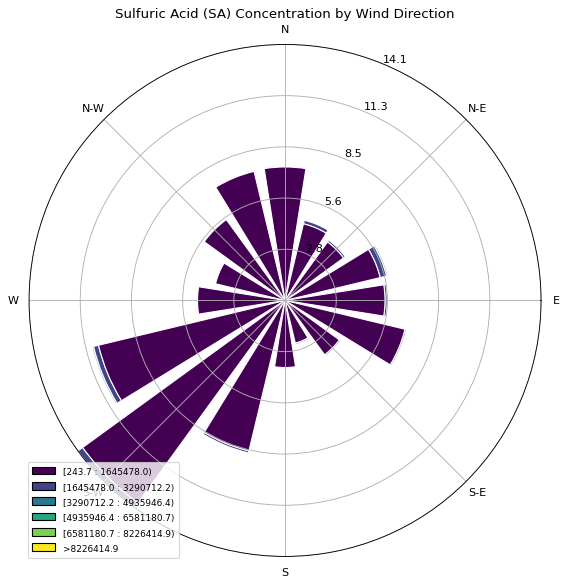

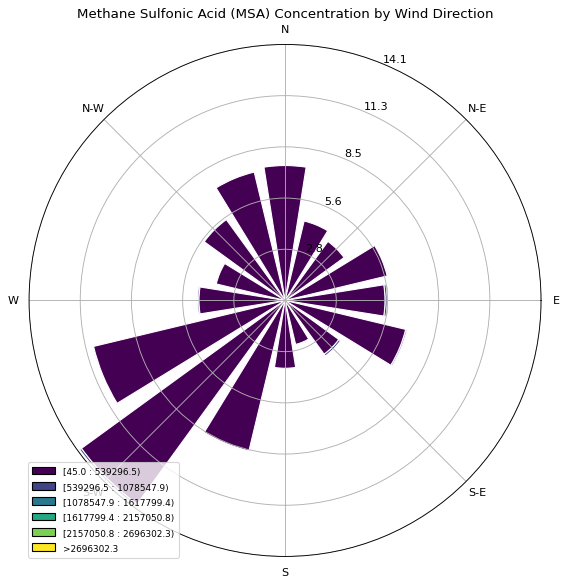

In [131]:
# Plot Wind Rose for SA
ax = WindroseAxes.from_ax()
ax.bar(data["Wind direction [°]"], data["sa"], normed=True, opening=0.8, edgecolor="white")
ax.set_title("Sulfuric Acid (SA) Concentration by Wind Direction")
ax.set_legend()
plt.show()

# Plot Wind Rose for MSA
ax = WindroseAxes.from_ax()
ax.bar(data["Wind direction [°]"], data["msa"], normed=True, opening=0.8, edgecolor="white")
ax.set_title("Methane Sulfonic Acid (MSA) Concentration by Wind Direction")
ax.set_legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# Convert wind direction to sine & cosine components
df["wind_x"] = np.cos(np.radians(df["wind_direction"])) * df["wind_speed"]
df["wind_y"] = np.sin(np.radians(df["wind_direction"])) * df["wind_speed"]

# Define Features & Targets
X = df[["wind_speed", "wind_x", "wind_y"]]
y_sa = df["SA"]
y_msa = df["MSA"]

# Split Data
X_train, X_test, y_sa_train, y_sa_test = train_test_split(X, y_sa, test_size=0.2, random_state=42)
X_train, X_test, y_msa_train, y_msa_test = train_test_split(X, y_msa, test_size=0.2, random_state=42)

# Train Random Forest Model for SA
rf_sa = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sa.fit(X_train, y_sa_train)
sa_preds = rf_sa.predict(X_test)

# Train XGBoost Model for MSA
xgb_msa = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_msa.fit(X_train, y_msa_train)
msa_preds = xgb_msa.predict(X_test)

# Evaluate Performance
print("SA Model MAE:", mean_absolute_error(y_sa_test, sa_preds))
print("MSA Model MAE:", mean_absolute_error(y_msa_test, msa_preds))


In [135]:
from utils.data_extract import fetch_combined_data

# Use the year and will start from starting to ending time
variables = ['VAR_META.GLOB', 'VAR_META.PAR'] # 'HYY_META.Glob', 'HYY_META.RH1250', 'HYY_META.T1250'
start_year = 2015
end_year = 2023

data_fetched = fetch_combined_data(variables, start_year, end_year)

In [136]:
data_fetched

,VAR_META.GLOB,VAR_META.PAR
time,,
2015-01-01 00:00:00,-1.287,0.0
2015-01-01 00:01:00,-1.190,0.0
2015-01-01 00:02:00,-1.043,0.0
2015-01-01 00:03:00,-1.141,0.0
2015-01-01 00:04:00,-1.092,0.0
...,...,...
2023-12-30 23:55:00,-1.180,0.0
2023-12-30 23:56:00,-0.100,0.0
2023-12-30 23:57:00,-1.360,0.0
